In [1]:
# Angle
%matplotlib inline
import torch
import torchvision
from IPython import display
from torchvision import transforms
from d2l import torch as d2l

def angle(v, w):
    return torch.acos(v.dot(w) / (torch.norm(v) * torch.norm(w)))

print(angle(torch.tensor([0, 1, 2], dtype=torch.float32), torch.tensor([2.0, 3, 4])))

tensor(0.4190)


/home/sann_htet/Desktop/Computer_Science_and_AI/AI/Dive_into_deep_learning/.venv/lib/python3.12/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
# Hyperplanes
# Load the dataset
trans = []
trans.append(transforms.ToTensor())
trans = transforms.Compose(trans)
train = torchvision.datasets.FashionMNIST(root="/data", transform=trans,
                                          train=True, download=True)
test = torchvision.datasets.FashionMNIST(root="/data", transform=trans,
                                         train=False, download=True)

X_train_0 = torch.stack(
    [x[0] * 256 for x in train if x[1]==0]).type(torch.float32)
X_train_1 = torch.stack(
    [x[0] * 256 for x in train if x[1] == 1]).type(torch.float32)
X_test = torch.stack(
    [x[0] * 256 for x in test if x[1] == 0 or x[1] == 1]).type(torch.float32)
y_test = torch.stack([torch.tensor(x[1]) for x in test
                      if x[1] == 0 or x[1] == 1]).type(torch.float32)

# Compute averages
ave_0 = torch.mean(X_train_0, axis=0)
ave_1 = torch.mean(X_train_1, axis=0)

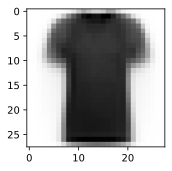

In [24]:
# Plot average t-shirt
d2l.set_figsize()
d2l.plt.imshow(ave_0.reshape(28, 28).tolist(), cmap='Greys')
d2l.plt.show()

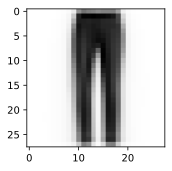

In [25]:
# Plot average trousers
d2l.plt.imshow(ave_1.reshape(28, 28).tolist(), cmap='Greys')
d2l.plt.show()

In [26]:
# Print test set accuracy with eyeballed threshold
w = (ave_1 - ave_0).T

/tmp/ipykernel_5061/1617541758.py:2: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3725.)
  w = (ave_1 - ave_0).T


In [29]:
# '@' is Matrix Multiplication operator in pytorch.
predictions = X_test.reshape(2000, -1) @ (w.flatten()) > -1500000
# Accuracy
print(torch.mean((predictions.type(y_test.dtype) == y_test).float(), dtype=torch.float64))

tensor(0.7870, dtype=torch.float64)


# Eigenvectors as Long Term Behavior

In [2]:
torch.manual_seed(42)
k = 5
A = torch.randn(k, k, dtype=torch.float64)
A

tensor([[ 0.2996,  0.2424,  0.2832, -0.2329,  0.6712],
        [ 0.7818, -1.7903, -1.7484,  0.1735, -0.1182],
        [-1.7446, -0.4695,  0.4573,  0.5177, -0.2771],
        [-0.6641,  0.6551,  0.2616, -1.5265, -0.3311],
        [-0.6378,  0.1072,  0.7096,  0.3009, -0.2869]], dtype=torch.float64)

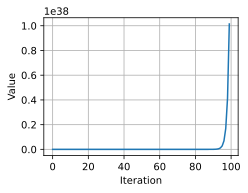

In [9]:
# Calculate the sequence of norms after repeatedly applying `A`
v_in = torch.randn(k, 1, dtype=torch.float64)
norm_list = [torch.norm(v_in).item()]
for i in range(1, 100):
    v_in = A @ v_in
    norm_list.append(torch.norm(v_in).item())
d2l.plot(torch.arange(0, 100), norm_list, 'Iteration', 'Value')

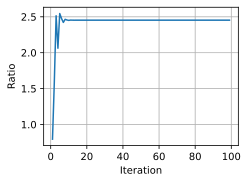

In [10]:
# Compute the scaling factor of the norms
norm_ratio_list = []
for i in range(1, 100):
    norm_ratio_list.append(norm_list[i]/norm_list[i - 1])
d2l.plot(torch.arange(1, 100), norm_ratio_list, 'Iteration', 'Ratio')

In [11]:
# Compute the eigenvalues
eigs = torch.linalg.eig(A).eigenvalues.tolist()
norm_eigs = [torch.abs(torch.tensor(x)) for x in eigs]
norm_eigs.sort()
print(f'norms of eigenvalues: {norm_eigs}')

norms of eigenvalues: [tensor(0.3490), tensor(1.1296), tensor(1.1296), tensor(1.1828), tensor(2.4532)]


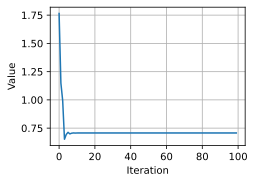

In [ ]:
# Rescale the matrix `A`
A /= norm_eigs[-1]

# Do the same experiment again
v_in = torch.randn(k, 1, dtype=torch.float64)

norm_list = [torch.norm(v_in).item()]
for i in range(1, 100):
    v_in = A @ v_in
    norm_list.append(torch.norm(v_in).item())

d2l.plot(torch.arange(0, 100), norm_list, 'Iteration', 'Value')

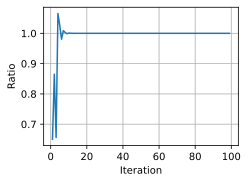

In [15]:
# Also plot the ratio
norm_ratio_list = []
for i in range(1, 100):
    norm_ratio_list.append(norm_list[i]/norm_list[i-1])

d2l.plot(torch.arange(1, 100), norm_ratio_list, 'Iteration', 'Ratio')

# Differential Calculus

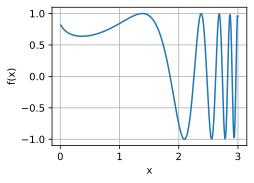

In [19]:
%matplotlib inline
import torch
from IPython import display
from d2l import torch as d2l

torch.pi = torch.acos(torch.zeros(1)).item() * 2 # Define pi in torch

# Plot a function in a normal range
x_big = torch.arange(0.01, 3.01, 0.01)
ys = torch.sin(x_big**x_big)
d2l.plot(x_big, ys, 'x', 'f(x)')

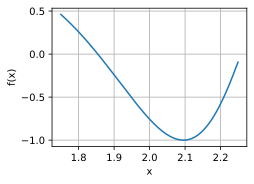

In [20]:
# Plot a the same function in a tiny range
x_med = torch.arange(1.75, 2.25, 0.001)

ys = torch.sin(x_med**x_med)
d2l.plot(x_med, ys, 'x', 'f(x)')

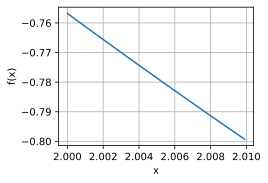

In [21]:
# Plot a the same function in a tiny range
x_small = torch.arange(2.0, 2.01, 0.0001)
ys = torch.sin(x_small**x_small)
d2l.plot(x_small, ys, 'x', 'f(x)')